In [2]:
#imorting the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from IPython.display import display
from PIL import Image

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [3]:
#Initialize the CNN
classifier = Sequential()

#Step 1 - Convolution
classifier.add(Conv2D(32, 3, 3, 
                             input_shape = (128, 128, 3)))
               
classifier.add(LeakyReLU(alpha=0.1))

#step 2 - pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#2nd layer
classifier.add(Conv2D(64, 3, 3))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#3rd layer
classifier.add(Conv2D(128, 3, 3))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#step 3 - Flattening
classifier.add(Flatten())

#step 4 - Full Connection
classifier.add(Dense(output_dim = 128))

classifier.add(LeakyReLU(alpha=0.1))

classifier.add(Dense(output_dim = 26, 
                     activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

#Fitting the CNN to the images
train_datagen = ImageDataGenerator(
        shear_range = 0.2,
        zoom_range = 0.2,
        rescale = 1./255,
        horizontal_flip = False)

test_datagen = ImageDataGenerator(
        rescale = 1./255)

W0724 23:07:50.630939 50888 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,...)`
  
W0724 23:07:50.653879 50888 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 23:07:50.657870 50888 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 23:07:50.676816 50888 deprecation_wrapper.py:119] 

In [4]:
training_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/New Image Dataset/train_set2',
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical')

test_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/New Image Dataset/test_set2',
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical')

Found 143 images belonging to 26 classes.
Found 53 images belonging to 26 classes.


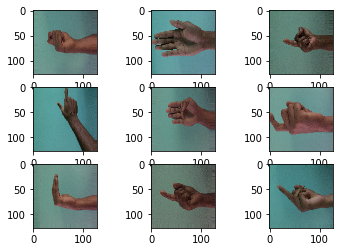

In [5]:
# generate samples and plot
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = training_set.next()
    image = batch[0]
    plt.imshow(image[1])

#show the figure
pyplot.show()

In [7]:
#Training the network

history = classifier.fit_generator(
        training_set,
        steps_per_epoch = 200,
        epochs = 10,
        validation_data = test_set,
        validation_steps = 20)

Epoch 1/10
200/200 [==============================] - 700s 4s/step - loss: 0.0323 - acc: 0.9905 - val_loss: 0.9257 - val_acc: 0.8094
Epoch 2/10
200/200 [==============================] - 675s 3s/step - loss: 0.0278 - acc: 0.9918 - val_loss: 0.9794 - val_acc: 0.8340
Epoch 3/10
200/200 [==============================] - 688s 3s/step - loss: 1.1919e-04 - acc: 1.0000 - val_loss: 0.9888 - val_acc: 0.8208
Epoch 4/10
200/200 [==============================] - 698s 3s/step - loss: 4.1482e-05 - acc: 1.0000 - val_loss: 1.0896 - val_acc: 0.8264
Epoch 5/10
200/200 [==============================] - 716s 4s/step - loss: 2.9806e-05 - acc: 1.0000 - val_loss: 1.0994 - val_acc: 0.8094
Epoch 6/10
200/200 [==============================] - 721s 4s/step - loss: 6.2155e-05 - acc: 1.0000 - val_loss: 1.1150 - val_acc: 0.8189
Epoch 7/10
200/200 [==============================] - 686s 3s/step - loss: 3.1058e-05 - acc: 1.0000 - val_loss: 0.9594 - val_acc: 0.8509
Epoch 8/10
200/200 [=============================

In [8]:
# save model and architecture to single file
classifier.save("model.hNew26_03")
print("Saved model to disk")

Saved model to disk
